# Decision Tree
Python Implementation of Decision Tree Classifier
Problem Statement:
One of the very famous classification problems in Machine Learning is the IRIS Flower classification problem.Iris is the family in the flower which contains several species such as the Iris setosa, Iris versicolor, Iris virginica, etc.

In this tutorial you are going to Classify the three species of Iris family based on petal width, petal length, sepal length, and sepal width.

In [11]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [12]:
data = pd.read_csv("./iris.csv")

In [13]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
#Printing Dimension of datasets
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (150, 5)
Number of rows in the dataset: 150
Number of columns in the dataset: 5


In [15]:
# printing attributes (columns) name
print("Column Names:",data.columns.values)

Column Names: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']


# Exploratory Data Analysis (EDA)

In [16]:

# Showing datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2-D Scatter plot

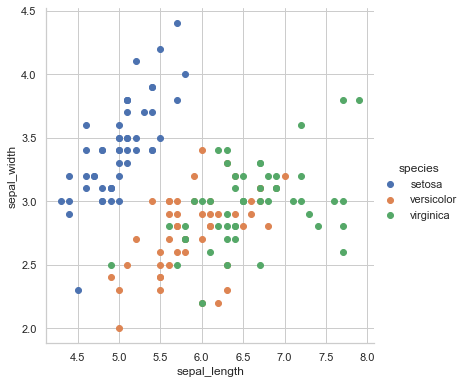

In [18]:
# 2-D Scatter plot.
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="species", size=5.5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Similarly we can draw multiple 2-D scatter plots for each combination of features so total cobinations = 4C2 = 6

# Pairplot on the data
Pair plot makes high-level scatter plots to capture relationships between multiple variables within a dataframe.

Dis-advantages
Can be used when number of features are high.

Cannot visualize higher dimensional patterns in 3-D and 4-D.

Only possible to view 2D patterns.


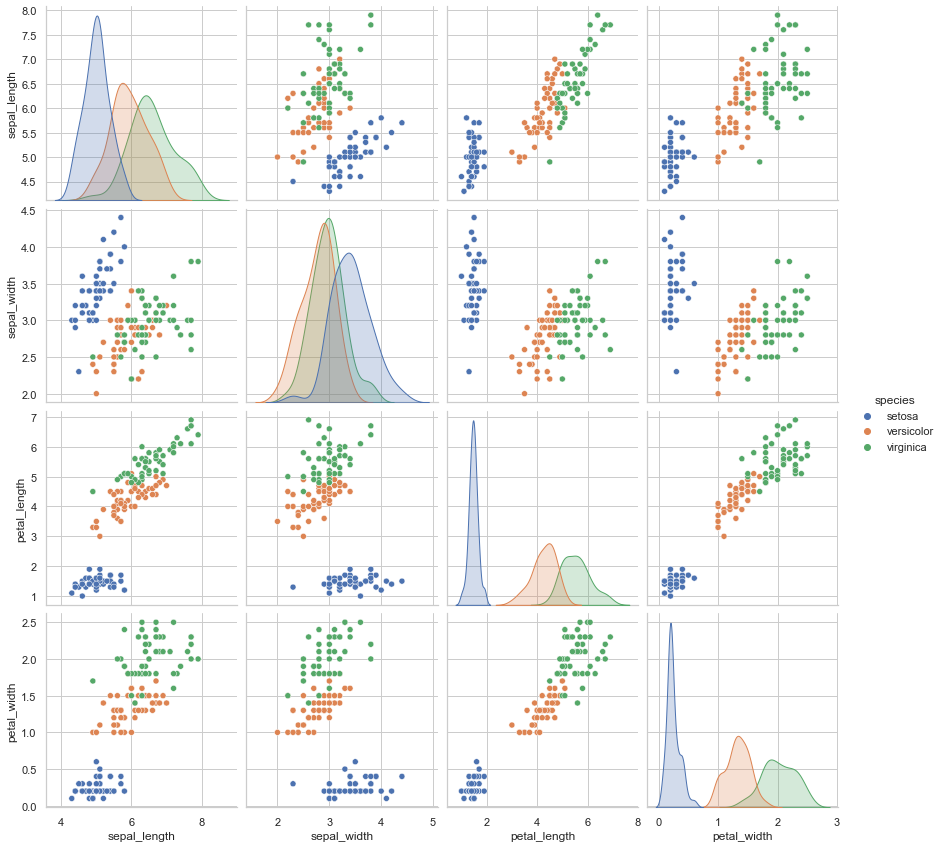

In [19]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="species", size=3);
plt.show()

# Univariate Analysis using PDF
Let’s do some univariate ananlysis using PDF to find one of my 4 variable i.e Sepal length, Sepal width, Petal length, and Petal width is more useful to distinguish my flowers.


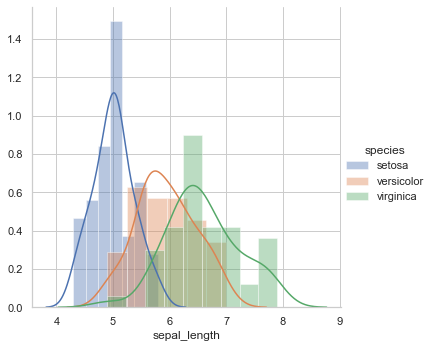

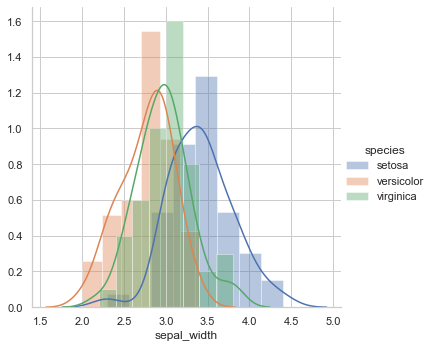

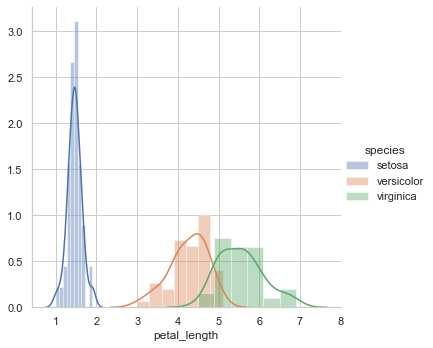

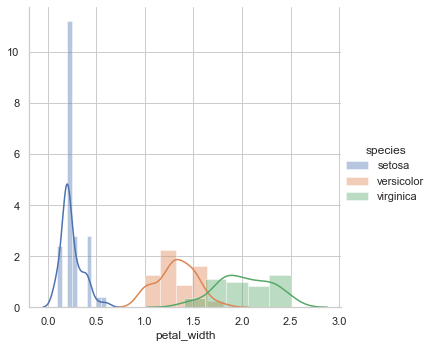

In [20]:
for name in data.columns.values[:-1]:
    sns.FacetGrid(data, hue="species", size=5).map(sns.distplot, name).add_legend()
plt.show()

# boxplot and whiskers
A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.


<AxesSubplot:>

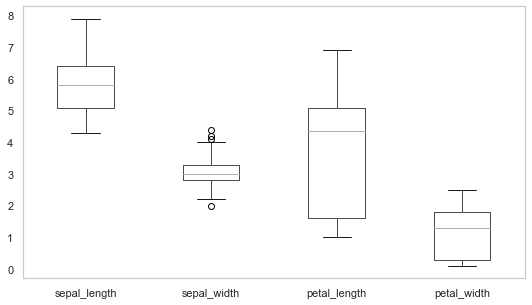

In [21]:
data.boxplot(column= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],figsize=(9,5),grid = False)

In [22]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [23]:
# Extracting dataframe for only 'Object' datatypes
data_ct = data.select_dtypes(include='object')
data_ct.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [24]:
# Extracting dataframe for only 'number' datatypes
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
#data points for each class
data.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

Text(0.5, 1.0, 'Species distribution')

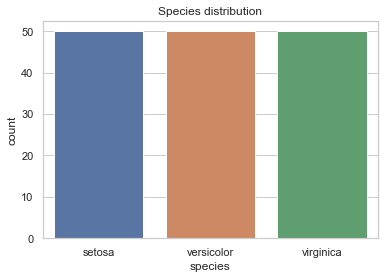

In [26]:

#Count plot for Species
sns.countplot('species',data = data)
plt.title("Species distribution")

# Converting the species labels into numeric
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [27]:
# # Import label encoder 
# from sklearn import preprocessing 
  
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# data['species']= label_encoder.fit_transform(data['species'])

In [28]:
#Check unique value of species
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [29]:
# Showing overview of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Correlation
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related

In [30]:
#Constructing correlation Matrix
corr = data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


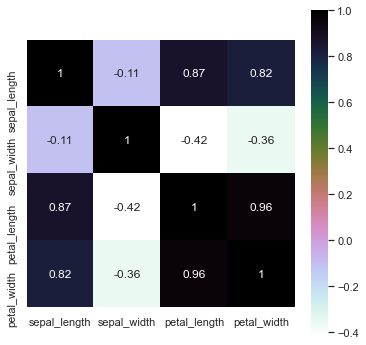

In [31]:
#heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [32]:
# Splitting Data set into train and validation

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30,random_state = 1)

In [33]:
#considering only highly correlated features for training and validation
train_x = train.drop(['species'], axis = 1)
train_y = train['species']             

test_x = test.drop(['species'],axis = 1)
test_y = test['species']

In [34]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (105, 4)
Dimension of train_y : (105,)
Dimension of test_x : (45, 4)
Dimension of test_y : (45,)


In [35]:
#Using Decision Tree Classifier for model building by "gini"

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=2,criterion="entropy")
clf.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [36]:
# Predict Species for test data
pred = clf.predict(test_x)
pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [37]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the Decision Tree is 95.56%


# Hyperparameter Tuning
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem.

# GridSearchCV
In GridSearchCV approach, machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for best set of hyperparameters from a grid of hyperparameters values.

In [38]:
# Tuning Parameters using Grid search cross validation 
from sklearn.model_selection import GridSearchCV
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(1,6,1)), 
              "min_samples_leaf": list(range(1,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=1), tree_params, cv=3)
grid_tree.fit(train_x, train_y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6]})

In [39]:
# tree best estimator
tree_clf = grid_tree.best_estimator_
tree_clf

DecisionTreeClassifier(max_depth=3, random_state=1)

In [40]:
#Print hyperparameter
print("Tuned hyperparameter: {}".format(grid_tree.best_params_)) 
print("Best score: {}".format(grid_tree.best_score_))

Tuned hyperparameter: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
Best score: 0.9523809523809524


In [41]:
#Using best hyperparameter

DT = tree_clf.fit(train_x,train_y)
y_pred = DT.predict(test_x)
acc = accuracy_score(y_pred,test_y)
print('The accuracy of the Decision tree after hyperparameter tuning: {}%'.format(round(acc*100,2)))

The accuracy of the Decision tree after hyperparameter tuning: 95.56%


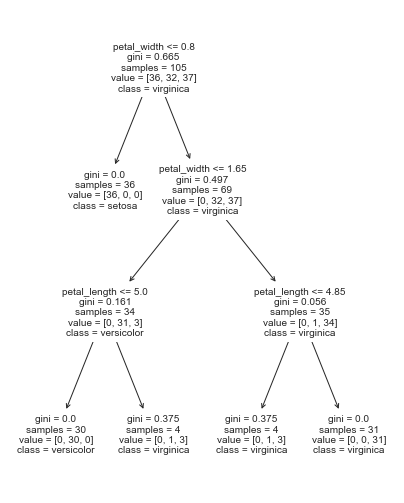

In [42]:
#Model Visualization
from sklearn import tree

plt.figure(figsize = (7,9))
tree.plot_tree(DT,feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
               class_names= ['setosa','versicolor','virginica'],proportion = False)
plt.show()

In [44]:
#Model visualization
from sklearn.tree import export_text
r = export_text(DT, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(r)

|--- petal_width <= 0.80
|   |--- class: setosa
|--- petal_width >  0.80
|   |--- petal_width <= 1.65
|   |   |--- petal_length <= 5.00
|   |   |   |--- class: versicolor
|   |   |--- petal_length >  5.00
|   |   |   |--- class: virginica
|   |--- petal_width >  1.65
|   |   |--- petal_length <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal_length >  4.85
|   |   |   |--- class: virginica



In [ ]:
#lets see the actual and predicted value 
test = test.reset_index(drop = True)
test["pred_species"] = y_pred
test.head()